# CSC 580 Artificial Intelligence II, Winter 2025

# HW\#2 Cliffwalk -- Start-up code


### 1. Install gymnasium and create a Cliff Walk environment


In [1]:
%pip install "gymnasium[toy-text]"

Note: you may need to restart the kernel to use updated packages.


In [3]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

env = gym.make("CliffWalking-v0", is_slippery=True, render_mode="rgb_array")
env.reset()

env.render( )  # Get the current frame as an RGB array


array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]

In [4]:

#print (env.render())  # textual output if mode == 'ansi' or 'human'
env.render() # gui/rgb output

array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]

### 2. Inspect environment, transition probabilities and rewards


In [5]:
nS = env.observation_space.n    # number of states -- 48
nA = env.action_space.n         # number of actions -- four directions; 0:left, 1:down, 2:right, 3:up
print ("{}, {}".format(nS, nA))

48, 4


Transition probabilities, rewards and other info are stored a dictionary **env.P**. You use state index (0-based) to access the info. The tuple for each transition indicates (transition_probability, new_state, reward, terminated).

**IMPORTANT**: If you get an error "AttributeError: 'OrderEnforcing' object has no attribute 'P'", add a line to unwrap the environment and access P inside. For example,

<pre># Access the underlying environment using env.unwrapped
env_unwrapped = env.unwrapped

# Now you can access the transition probabilities
env_unwrapped.P[0]</pre>


In [6]:
# Probatilies from State 0 (top-left corner).
#env.P[0]

# Access the underlying environment using env.unwrapped
env_unwrapped = env.unwrapped

# Now you can access the transition probabilities
env_unwrapped.P[0]

{0: [(0.3333333333333333, np.int64(0), -1, False),
  (0.3333333333333333, np.int64(0), -1, False),
  (0.3333333333333333, np.int64(1), -1, False)],
 1: [(0.3333333333333333, np.int64(0), -1, False),
  (0.3333333333333333, np.int64(1), -1, False),
  (0.3333333333333333, np.int64(12), -1, False)],
 2: [(0.3333333333333333, np.int64(1), -1, False),
  (0.3333333333333333, np.int64(12), -1, False),
  (0.3333333333333333, np.int64(0), -1, False)],
 3: [(0.3333333333333333, np.int64(12), -1, False),
  (0.3333333333333333, np.int64(0), -1, False),
  (0.3333333333333333, np.int64(0), -1, False)]}

In [7]:
# Probatilies from the start state (36)
env_unwrapped.P[36]

{0: [(0.3333333333333333, np.int64(36), -1, False),
  (0.3333333333333333, np.int64(24), -1, False),
  (0.3333333333333333, np.int64(36), -100, False)],
 1: [(0.3333333333333333, np.int64(24), -1, False),
  (0.3333333333333333, np.int64(36), -100, False),
  (0.3333333333333333, np.int64(36), -1, False)],
 2: [(0.3333333333333333, np.int64(36), -100, False),
  (0.3333333333333333, np.int64(36), -1, False),
  (0.3333333333333333, np.int64(36), -1, False)],
 3: [(0.3333333333333333, np.int64(36), -1, False),
  (0.3333333333333333, np.int64(36), -1, False),
  (0.3333333333333333, np.int64(24), -1, False)]}

In [8]:
# Transition probability for trying to go left (action 3) from the start state (36)
env_unwrapped.P[24][1]

[(0.3333333333333333, np.int64(12), -1, False),
 (0.3333333333333333, np.int64(25), -1, False),
 (0.3333333333333333, np.int64(36), -1, False)]

## 3. Create a random/fixed policy and run the policy once.


In [9]:
def generate_random_policy(num_actions, num_states, seed=None):
    """
    A policy is a 1D array of length # of states, where each element is a
    number between 0 (inclusive) and # of actions (exclusive) randomly chosen.
    If a specific seed is passed, the same numbers are genereated, while
    if the seed is None, the numbers are unpredictable every time.
    """
    rng = np.random.default_rng(seed)
    return rng.integers(low=0, high=num_actions, size=num_states)

In [10]:
def run(env, pi, printinfo = False):
    """
    Run the policy on the environment and returns the cumulative reward.
    :param: env: The environment
    :param: pi: A given policy, represented as a 1D array of length # of states.
    :return: Cumulative reward
    """
    s = env.reset()
    if printinfo == True:
      print (f'\n* Episode starting from state {s[0]}') # ensure starting from state 36

    s = s[0]      # extract the state value/index from the tuple
    done = False  # this becomes true when agent reaches the goal state (47)
    sum_r = 0
    step_count = 0
    near_fall = 0
    near_fall_cells = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
    while not done:
        a = pi[s]   # action for the state s, according to the policy
        if s in near_fall_cells:
            near_fall += 1
        step_count += 1
        s, r, done, info, p = env.step(a)  # take the action
        sum_r += r  # accumulate reward

        ### uncomment below to see the information for each step
        #print (f'next_state={s}, reward={r}, done={done}, info={info}, p={p}')

        # prints info in text if render_mode is 'ansi' or no output if 'human',
        # or graphical output if 'rgb_array' AND if the code is run from command line.
        env.render()
    return sum_r,step_count,near_fall

### Run the given policy just once and observe what's returned (the total return).


In [11]:
policy = generate_random_policy(nA, nS, 17) # third parameter is the random seed
print ("*** Policy ***\n{}".format(policy.reshape((4, 12))))

# Do just one run
result = run(env, policy)
# Print the total rewards/return
print (f' ==> Total return: {result}')

*** Policy ***
[[2 3 0 0 1 2 3 1 0 0 1 1]
 [3 1 2 2 0 2 0 0 2 1 1 2]
 [0 0 2 3 2 3 1 0 2 2 2 2]
 [1 0 2 0 1 0 2 1 1 2 0 1]]
 ==> Total return: (-19859, 3425, 636)


In [19]:
def procedure(policy, num_episodes):
    """
    Run the policy for a number of episodes and return the average cumulative reward.
    :param: policy: A given policy, represented as a 1D array of length # of states.
    """
    print ("Running the policy for {} episodes...".format(num_episodes))
    total_reward = []
    total_steps = []
    total_near_fall= []
    for i in range(num_episodes):
        if i % 10 == 0:
            print("Currently at episode: ", i)
        r, steps, near_fall_count = run(env, policy)
        total_reward.append(r)
        total_steps.append(steps)
        total_near_fall.append(near_fall_count)
    return total_reward, total_steps, total_near_fall

In [24]:
import matplotlib.pyplot as plt
def output(total_reward, total_steps, total_near_fall):
    """
    Output the average cumulative reward and the standard deviation.
    """
    print (f' ==> Average reward: {np.mean(total_reward)}')
    print (f' ==> Average steps: {np.mean(total_steps)}')
    print (f' ==> Average near fall: {np.mean(total_near_fall)}')
    print (f' ==> Standard deviation of reward: {np.std(total_reward)}')
    print (f' ==> Standard deviation of steps: {np.std(total_steps)}')
    print (f' ==> Standard deviation of near fall: {np.std(total_near_fall)}')
    
    plt.hist(total_reward, bins=20)
    plt.title('Histogram of rewards')
    plt.show()
    
    plt.hist(total_steps, bins=20)
    plt.title('Histogram of steps')
    plt.show()
    
    plt.hist(total_near_fall, bins=20)
    plt.title('Histogram of near falls')
    plt.show()
    
    

Running the policy for 100 episodes...
Currently at episode:  0
Currently at episode:  10
Currently at episode:  20
Currently at episode:  30
Currently at episode:  40
Currently at episode:  50
Currently at episode:  60
Currently at episode:  70
Currently at episode:  80
Currently at episode:  90
 ==> Average reward: -28211.58
 ==> Average steps: 4229.82
 ==> Average near fall: 772.21
 ==> Standard deviation of reward: 30576.73108302455
 ==> Standard deviation of steps: 4574.769614701925
 ==> Standard deviation of near fall: 840.5266122497254


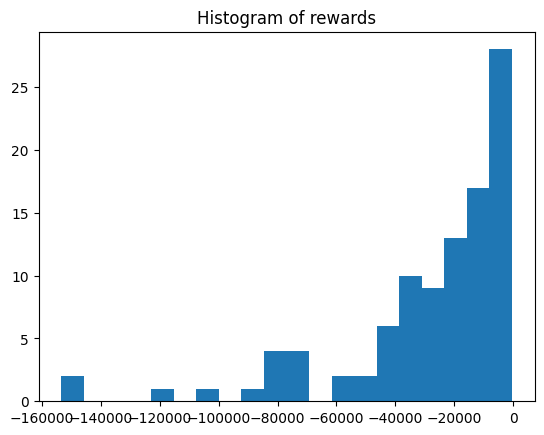

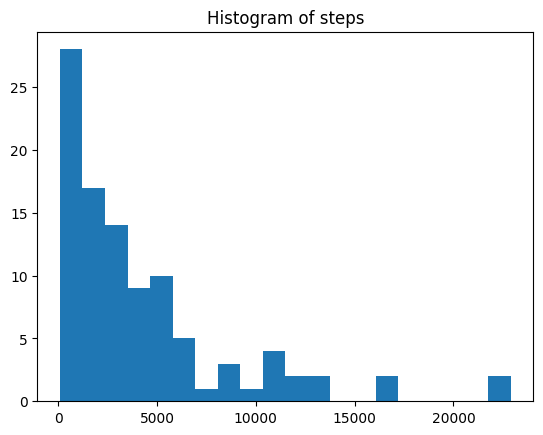

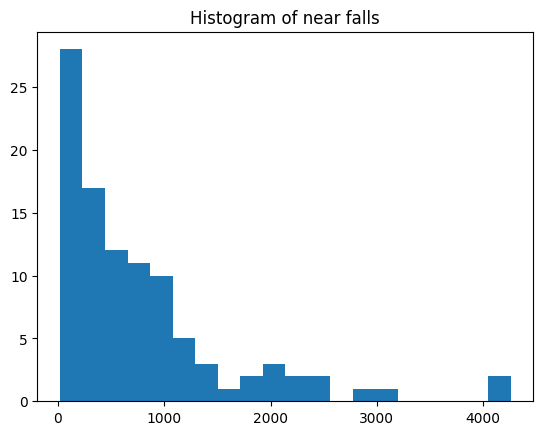

Running the policy for 100 episodes...
Currently at episode:  0


KeyboardInterrupt: 

In [25]:
# Do 100 runs and print the average return
n = 100
    
policy1 = generate_random_policy(nA, nS, 17) # third parameter is the random seed
policy2 = generate_random_policy(nA, nS, 42) # third parameter is the random seed
policy3 = generate_random_policy(nA, nS, 123) # third parameter is the random seed

for policy in [policy1, policy2, policy3]:
    total_reward, total_steps, total_near_fall = procedure(policy, n)
    output(total_reward, total_steps, total_near_fall)